# lib와 데이터 로딩

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 문제정의
- 나이와 연봉으로 분석해서, 물건을 구매할지 안할지를 분류하자!!(이진분류)
    - 어떤 고객이 구매할 가능성이 높은지 예측
    - 고객 세분화 : 나이, 성별, 연봉에 따른 구매 패턴 분석
    - 마케팅 타겟팅 : 구매 가능성 높은 고객군 식별

## 데이터 수집
- 마케팅/광고 캠페인 반응 데이터 
- User ID: 고객 ID
- Gender: 성별 (Male/Female)
- Age: 나이
- EstimatedSalary: 추정 연봉
- Purchased: 구매 여부 (0=구매 안 함, 1=구매함)

In [171]:
data_path = "datas_ml/Social_Network_Ads.csv"
df = pd.read_csv(data_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [172]:
# label 또는  y의 칼럼의 value counts를 확인
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# 데이터 EDA 수행

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# 데이터 전처리

In [174]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [175]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## X, y 데이터로 분할

In [176]:
# X = df.loc[행,열]
X = df.loc[:,['Gender', 'Age', 'EstimatedSalary']]
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [177]:
# y
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [178]:
X['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [179]:
# map()함수 사용
mapping = {'Male':0, 'Female':1}
X['Gender'] = X['Gender'].map(mapping)
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


## Feature scaling

In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [181]:
# 객체 생성
X_scaler = StandardScaler()
X_scaler

,copy,True
,with_mean,True
,with_std,True


In [182]:
X.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
dtype: object

In [183]:
X_scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [184]:
# X_scaler.fit(X)
# X_scaler.transform(X)

# 위의 두 문장을 한꺼번에 실행하는 메서드
X_scaled = X_scaler.fit_transform(X)
X_scaled

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]], shape=(400, 3))

# 학습, 테스트 데이터 분할

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=2025, stratify=y)

In [187]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [188]:
X_test.shape, y_test.shape

((100, 3), (100,))

# 모델 학습 및 평가

## 모델 객체생성

In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
# 모델 객체 생성(빈 깡통 ai)
model_logrc = LogisticRegression()
model_logrc

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [191]:
# 빈 깡통 ai라 오류남
model_logrc.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

## 학습하기

In [192]:
model_logrc.fit(X_train, y_train)  # 모델 학습

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [193]:
# w1, w2, w3 (weight)
model_logrc.coef_

array([[-0.30005386,  2.45875817,  1.19128226]])

In [194]:
# w0 (bias)
model_logrc.intercept_

array([-1.14048041])

In [195]:
y_pro = model_logrc.predict_proba(X_test)  # 5개 샘플에 대한 예측 확률

In [196]:
# y_pro, y_pred df 로 비교하기

y_result = pd.DataFrame(y_pro)
y_result["y_pred"] = y_pred

In [197]:
y_result

,0,1,y_pred
0,0.926093,0.073907,0
1,0.551053,0.448947,0
2,0.007128,0.992872,0
3,0.012530,0.987470,0
4,0.439108,0.560892,0
...,...,...,...
95,0.284119,0.715881,1
96,0.078088,0.921912,0
97,0.941472,0.058528,0
98,0.945508,0.054492,0


In [198]:
y_result.tail(20)

,0,1,y_pred
80,0.718050,0.281950,1
81,0.026537,0.973463,1
82,0.491398,0.508602,0
83,0.798957,0.201043,0
84,0.011696,0.988304,0
85,0.781419,0.218581,0
86,0.790635,0.209365,0
87,0.833987,0.166013,0
88,0.981435,0.018565,1
89,0.750998,0.249002,0


## 모델 테스트

In [199]:
# 모의고사 보는 것
y_pred = model_logrc.predict(X_test)

In [200]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [201]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# 모델 평가하기
- 지도학습은 기본적으로 정확도를 확인함

In [202]:
# 정확도
(y_test == y_pred).sum()

np.int64(83)

In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

83.0

### 정확도(accuracy)

In [204]:
# 정확도
(y_test == y_pred).sum() / len(y_test) * 100

np.float64(83.0)

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

83.0

### 정밀도(precision), 재현율(직중율, recall)

In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [223]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report

In [224]:
# 재현율
recall_score(y_test, y_pred)

0.6666666666666666

In [225]:
# 정밀도
precision_score(y_test, y_pred)

0.8275862068965517

In [226]:
# ML의 분류제 종합 평가 함수
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.83      0.67      0.74        36

    accuracy                           0.83       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.83      0.83      0.83       100



# 모델 결과를 보고 전략을 짠다

In [227]:
import seaborn as sb

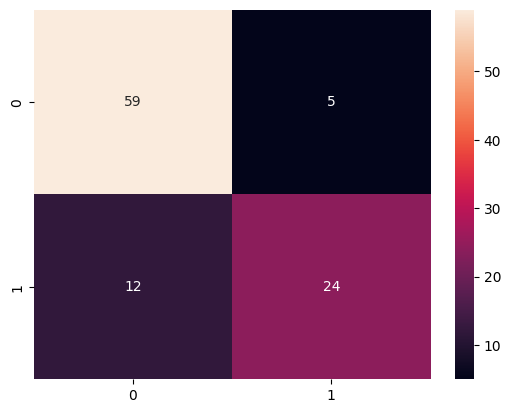

In [228]:
sb.heatmap(data=cm, annot=True)
plt.show()

# 분류 결과 시각화 하기

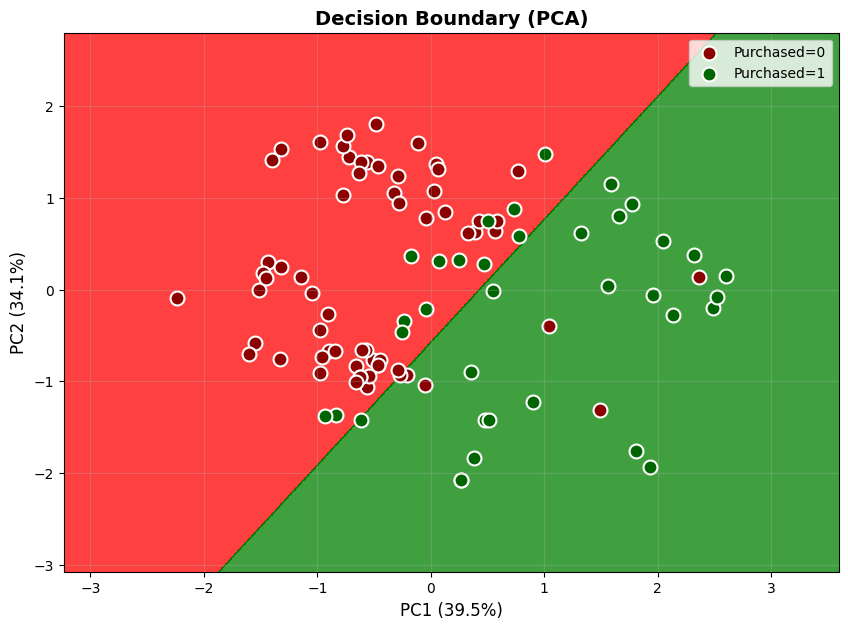

In [230]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 3D → 2D 차원 축소
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# 2D meshgrid
X1, X2 = np.meshgrid(
    np.arange(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 0.01),
    np.arange(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 0.01)
)

# 원래 3D 공간으로 역변환 후 예측
X_grid_2d = np.c_[X1.ravel(), X2.ravel()]
X_grid_3d = pca.inverse_transform(X_grid_2d)
predictions = model_logrc.predict(X_grid_3d).reshape(X1.shape)

# 시각화
plt.figure(figsize=(10, 7))
plt.contourf(X1, X2, predictions,
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

for i, j in enumerate([0, 1]):
    plt.scatter(X_test_2d[y_test == j, 0], 
               X_test_2d[y_test == j, 1],
               c='darkred' if j == 0 else 'darkgreen',
               label=f'Purchased={j}',
               edgecolors='white',
               s=100,
               linewidth=1.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('Decision Boundary (PCA)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()